In [69]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [70]:
data = pd.read_csv("Desktop/Air_Quality_Monitoring_Data.csv")
data_new = data.dropna()

In [71]:
no2 = data_new.iloc[0:60000,3:4].values
o3_1hrs = data_new.iloc[0:60000,4:5].values
o3_4hrs = data_new.iloc[0:60000,5:6].values
co = data_new.iloc[0:60000,6:7].values
pm10 = data_new.iloc[0:60000,7:8].values
pm2 = data_new.iloc[0:60000,8:9].values
aqi_co = data_new.iloc[0:60000,9:10].values
aqi_no2 = data_new.iloc[0:60000,10:11].values
aqi_o3_1hrs = data_new.iloc[0:60000,11:12].values
aqi_o3_4hrs = data_new.iloc[0:60000,12:13].values
aqi_pm10 = data_new.iloc[0:60000, 13:14].values
aqi_pm2 = data_new.iloc[0:60000, 14:15].values
aqi_site = data_new.iloc[0:60000 , 15:16].values

In [107]:
from sklearn.model_selection import train_test_split
no2_train , no2_test , aqi_no2_train , aqi_no2_test = train_test_split(no2 , aqi_no2 , test_size = 1/3 , random_state = 101)
co_train , co_test , aqi_co_train , aqi_co_test = train_test_split(co , aqi_co , test_size = 1/3 , random_state = 101)
o3_1hrs_train , o3_1hrs_test , aqi_o3_1hrs_train , aqi_o3_1hrs_test = train_test_split(o3_1hrs , aqi_o3_1hrs , test_size = 1/3 , random_state = 101)
o3_4hrs_train , o3_4hrs_test , aqi_o3_4hrs_train , aqi_o3_4hrs_test = train_test_split(o3_4hrs , aqi_o3_4hrs , test_size = 1/3 , random_state = 101)
pm2_train , pm2_test , aqi_pm2_train , aqi_pm2_test = train_test_split(pm2 , aqi_pm2 , test_size = 1/3 , random_state = 101)
pm10_train , pm10_test , aqi_pm10_train , aqi_pm10_test = train_test_split(pm10 , aqi_pm10 , test_size = 1/3 , random_state = 101)

In [108]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [173]:
no2_model = Sequential()
no2_model.add(Dense(256, input_dim=1, kernel_initializer='normal', activation='relu'))
no2_model.add(Dense(128, input_dim=1, kernel_initializer='normal', activation='relu'))
no2_model.add(Dense(64, input_dim=1, kernel_initializer='normal', activation='relu'))
no2_model.add(Dense(32, input_dim=1, kernel_initializer='normal', activation='relu'))
no2_model.add(Dense(16, input_dim=1, kernel_initializer='normal', activation='relu'))
no2_model.add(Dense(1, kernel_initializer='normal'))
# Compile model
no2_model.compile(loss='mean_squared_error', optimizer='adam')

In [175]:
no2_model.fit(no2,aqi_no2,epochs=  10)

Epoch 1/10
60000/60000 [==============================] - 20s 328us/step - loss: 2.6860
Epoch 2/10
60000/60000 [==============================] - 19s 320us/step - loss: 2.6287
Epoch 3/10
60000/60000 [==============================] - 19s 315us/step - loss: 2.6160
Epoch 4/10
60000/60000 [==============================] - 17s 276us/step - loss: 2.7289
Epoch 5/10
60000/60000 [==============================] - 17s 276us/step - loss: 2.7980
Epoch 6/10
60000/60000 [==============================] - 17s 276us/step - loss: 2.5978
Epoch 7/10
60000/60000 [==============================] - 17s 281us/step - loss: 2.6180
Epoch 8/10
60000/60000 [==============================] - 19s 310us/step - loss: 2.6121
Epoch 9/10
60000/60000 [==============================] - 22s 359us/step - loss: 2.7009
Epoch 10/10
60000/60000 [==============================] - 17s 281us/step - loss: 2.6888


In [112]:
co_model = baseline_model()
co_model.fit(co_train, aqi_co_train, epochs = 6)

Epoch 1/6
40000/40000 [==============================] - 6s 162us/step - loss: 7.9222
Epoch 2/6
40000/40000 [==============================] - 7s 165us/step - loss: 0.0892
Epoch 3/6
40000/40000 [==============================] - 7s 181us/step - loss: 0.0874
Epoch 4/6
40000/40000 [==============================] - 6s 146us/step - loss: 0.0830
Epoch 5/6
40000/40000 [==============================] - 5s 121us/step - loss: 0.1239
Epoch 6/6
40000/40000 [==============================] - 5s 132us/step - loss: 0.1010


In [113]:
pm2_model = baseline_model()
pm2_model.fit(pm2_train, aqi_pm2_train , epochs = 2)

Epoch 1/2
40000/40000 [==============================] - 7s 178us/step - loss: 7118.1941
Epoch 2/2
40000/40000 [==============================] - 5s 125us/step - loss: 0.9781


In [114]:
pm10_model = baseline_model()
pm10_model.fit(pm10_train, aqi_pm10_train, epochs = 2)

Epoch 1/2
40000/40000 [==============================] - 7s 185us/step - loss: 1662.2782
Epoch 2/2
40000/40000 [==============================] - 5s 137us/step - loss: 0.3632


In [115]:
o31hrs_model = baseline_model()
o31hrs_model.fit(o3_1hrs_train, aqi_o3_1hrs_train, epochs = 10) 

Epoch 1/10
40000/40000 [==============================] - 7s 181us/step - loss: 180.8828
Epoch 2/10
40000/40000 [==============================] - 5s 127us/step - loss: 10.7550
Epoch 3/10
40000/40000 [==============================] - 5s 130us/step - loss: 5.4329
Epoch 4/10
40000/40000 [==============================] - 5s 129us/step - loss: 5.4474
Epoch 5/10
40000/40000 [==============================] - 5s 131us/step - loss: 5.4583
Epoch 6/10
40000/40000 [==============================] - 5s 126us/step - loss: 5.4426
Epoch 7/10
40000/40000 [==============================] - 5s 131us/step - loss: 5.4442
Epoch 8/10
40000/40000 [==============================] - 5s 130us/step - loss: 5.4596
Epoch 9/10
40000/40000 [==============================] - 5s 133us/step - loss: 5.4520
Epoch 10/10
40000/40000 [==============================] - 6s 145us/step - loss: 5.4681


In [167]:
o3_model = Sequential()
o3_model.add(Dense(128, input_dim=1, kernel_initializer='normal', activation='relu'))
o3_model.add(Dense(64, input_dim=1, kernel_initializer='normal', activation='relu'))
o3_model.add(Dense(32, input_dim=1, kernel_initializer='normal', activation='relu'))
o3_model.add(Dense(16, input_dim=1, kernel_initializer='normal', activation='relu'))
o3_model.add(Dense(1, kernel_initializer='normal'))
# Compile model
o3_model.compile(loss='mean_squared_error', optimizer='adam')

In [168]:
#o3_model = baseline_model()
o3_model.fit(o3_4hrs_train, aqi_o3_4hrs_train, epochs = 10)

Epoch 1/10
40000/40000 [==============================] - 9s 230us/step - loss: 205.3971
Epoch 2/10
40000/40000 [==============================] - 7s 181us/step - loss: 8.8195
Epoch 3/10
40000/40000 [==============================] - 7s 180us/step - loss: 8.7952
Epoch 4/10
40000/40000 [==============================] - 8s 203us/step - loss: 8.8334
Epoch 5/10
40000/40000 [==============================] - 7s 180us/step - loss: 8.8287
Epoch 6/10
40000/40000 [==============================] - 7s 181us/step - loss: 8.8345
Epoch 7/10
40000/40000 [==============================] - 7s 181us/step - loss: 8.8346
Epoch 8/10
40000/40000 [==============================] - 7s 186us/step - loss: 8.8697
Epoch 9/10
40000/40000 [==============================] - 8s 188us/step - loss: 8.7826
Epoch 10/10
40000/40000 [==============================] - 7s 184us/step - loss: 8.8980


In [118]:
PM2 = pm2_model.evaluate(pm2_test,aqi_pm2_test)

20000/20000 [==============================] - 2s 122us/step


In [119]:
PM10 = pm10_model.evaluate(pm10_test,aqi_pm10_test)

20000/20000 [==============================] - 2s 118us/step


In [123]:
O3 = o3_model.evaluate(o3_4hrs_test,aqi_o3_4hrs_test)

20000/20000 [==============================] - 1s 67us/step


In [124]:
CO = co_model.evaluate(co_test,aqi_co_test)

20000/20000 [==============================] - 1s 73us/step


In [176]:
NO2 = no2_model.evaluate(no2_test, aqi_no2_test)

20000/20000 [==============================] - 4s 176us/step


In [126]:
O3_1hrs = o31hrs_model.evaluate(o3_1hrs_test, aqi_o3_1hrs_test)

20000/20000 [==============================] - 3s 142us/step


In [169]:
O3_4hrs = o3_model.evaluate(o3_4hrs_test , aqi_o3_4hrs_test)

20000/20000 [==============================] - 3s 149us/step


In [177]:
print(PM2)
print(PM10)
print(CO)
print(NO2)
print(PM2)
print(PM10)
print(O3_1hrs)
print(O3_4hrs)

0.9077172077178955
0.3186128352165222
0.0913768289923668
2.503625814437866
0.9077172077178955
0.3186128352165222
5.398604423904419
8.639386757278443


In [178]:
no2_pred = no2_model.predict(no2_test)
co_pred = co_model.predict(co_test)
pm2_pred = pm2_model.predict(pm2_test)
pm10_pred = pm10_model.predict(pm10_test)
o3_pred = o3_model.predict(o3_4hrs_test)
o3_1hrs_pred = o31hrs_model.predict(o3_1hrs_test)

In [155]:
print(no2_pred)
print(aqi_no2)

[[1.2433083]
 [7.5508013]
 [7.5508013]
 ...
 [0.8356802]
 [0.8356802]
 [9.063076 ]]
[[ 0.]
 [ 5.]
 [15.]
 ...
 [ 0.]
 [ 0.]
 [ 5.]]


In [156]:
print(co_pred)
print(aqi_co)

[[1.798662  ]
 [1.6008302 ]
 [1.9964939 ]
 ...
 [2.1002436 ]
 [1.5019143 ]
 [0.02393617]]
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [157]:
print(pm2_pred)
print(aqi_pm2)

[[11.007807]
 [24.608082]
 [31.808228]
 ...
 [11.807825]
 [48.488564]
 [33.76827 ]]
[[14.]
 [25.]
 [14.]
 ...
 [10.]
 [24.]
 [ 2.]]


In [158]:
print(pm10_pred)
print(aqi_pm10)

[[21.873512]
 [16.269539]
 [23.87493 ]
 ...
 [15.869258]
 [24.035044]
 [33.30161 ]]
[[12.]
 [16.]
 [13.]
 ...
 [ 7.]
 [20.]
 [ 5.]]


In [159]:
print(o3_pred)
print(aqi_o3_4hrs)

[[21.90639]
 [21.90639]
 [21.90639]
 ...
 [21.90639]
 [21.90639]
 [21.90639]]
[[34.]
 [32.]
 [19.]
 ...
 [22.]
 [14.]
 [26.]]


In [160]:
print(aqi_o3_1hrs)
print(o3_1hrs_pred)

[[24.]
 [20.]
 [ 2.]
 ...
 [18.]
 [12.]
 [21.]]
[[27.658463]
 [10.266855]
 [10.266855]
 ...
 [29.590864]
 [17.996458]
 [ 2.537252]]


In [161]:
import matplotlib.pyplot as plt
import matplotlib.style 

In [162]:
plt.style.use("ggplot")

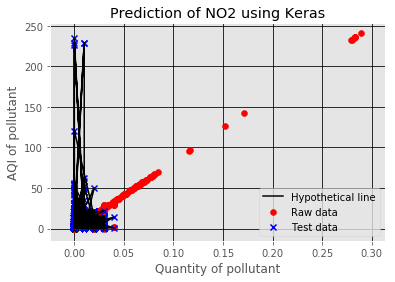

In [179]:
plt.title("Prediction of NO2 using Keras")
plt.grid(color = "black")
plt.scatter(no2, aqi_no2 , label = "Raw data" , color = "red")
plt.scatter(no2[40000:60000] , no2_pred , color = 'blue' , label = "Test data" , marker = "x")
plt.plot(no2[40000:60000] , no2_pred , color = "black" , label = "Hypothetical line")
plt.xlabel("Quantity of pollutant")
plt.ylabel("AQI of pollutant")
plt.legend()

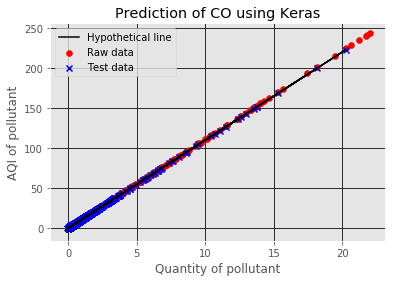

In [138]:
plt.title("Prediction of CO using Keras")
plt.grid(color = "black")
plt.scatter(co, aqi_co , label = "Raw data", color = "red")
plt.scatter(co_test , co_pred , color = 'blue' , label = "Test data" , marker = "x")
plt.plot(co_test , co_pred , color = "black" , label = "Hypothetical line")
plt.xlabel("Quantity of pollutant")
plt.ylabel("AQI of pollutant")
plt.legend()

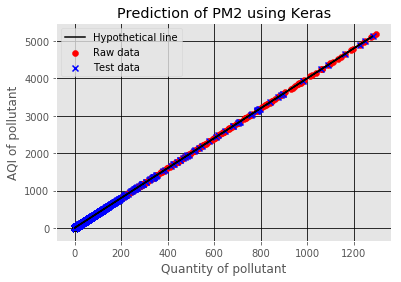

In [139]:
plt.title("Prediction of PM2 using Keras")
plt.grid(color = "black")
plt.scatter(pm2, aqi_pm2 , label = "Raw data", color = "red")
plt.scatter(pm2_test , pm2_pred , color = 'blue' , label = "Test data" , marker = "x")
plt.plot(pm2_test , pm2_pred , color = "black" , label = "Hypothetical line")
plt.xlabel("Quantity of pollutant")
plt.ylabel("AQI of pollutant")
plt.legend()

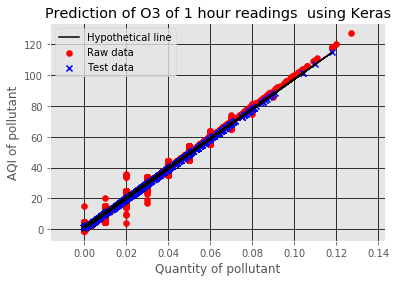

In [140]:
plt.title("Prediction of O3 of 1 hour readings  using Keras")
plt.grid(color = "black")
plt.scatter(o3_1hrs, aqi_o3_1hrs , label = "Raw data", color = "red")
plt.scatter(o3_1hrs_test , o3_1hrs_pred , color = 'blue' , label = "Test data" , marker= "x")
plt.plot(o3_1hrs_test , o3_1hrs_pred , color = "black" , label = "Hypothetical line")
plt.xlabel("Quantity of pollutant")
plt.ylabel("AQI of pollutant")
plt.legend()

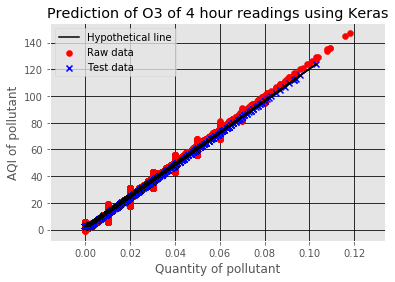

In [172]:
plt.title("Prediction of O3 of 4 hour readings using Keras")
plt.grid(color = "black")
plt.scatter(o3_4hrs, aqi_o3_4hrs , label = "Raw data", color = "red")
plt.scatter(o3_4hrs_test , o3_pred , color = 'blue' , label = "Test data" , marker = "x")
plt.plot(o3_4hrs_test , o3_pred , color = "black" , label = "Hypothetical line")
plt.xlabel("Quantity of pollutant")
plt.ylabel("AQI of pollutant")
plt.legend()

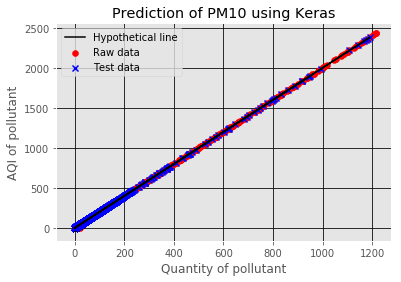

In [144]:
plt.title("Prediction of PM10 using Keras")
plt.grid(color = "black")
plt.scatter(pm10, aqi_pm10 , label = "Raw data", color = "red")
plt.scatter(pm10_test , pm10_pred , color = 'blue' , label = "Test data" , marker = "x")
plt.plot(pm10_test , pm10_pred , color = "black" , label = "Hypothetical line")
plt.xlabel("Quantity of pollutant")
plt.ylabel("AQI of pollutant")
plt.legend()